<div style='background-color: lightblue'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 30px;''>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color : lightblue'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
import acquire as a
import prepare as p
import functions as f

<div style='background-color : lightblue'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<h3><b>Acquire</b></h3>

- Data acquired from web-scraping 15 pages of README.md files from popular github repositories on 15 May 2023. The end result is a dataset containing 150 README content blocks, 50 for each of the 3 most popular programming languages.

**Filters**: Most Starred

**Languages**: Java, Javascript, Python

In [2]:
df = a.get_dataFrame()
df.shape

(150, 3)

---

<h3><b>Prepare</b></h3>

- Data Parsing

    - Convert text to all lower case for normalcy.
    - Remove any accented characters, non-ASCII characters.
    - Remove special characters.
    - Stem or lemmatize the words.
    - Remove stopwords.
    - Store the clean text and the original text for use in future notebooks.    
  
  
- Remove "giveaways"
    - Remove 'python', 'py', 'java', 'javascript', 'js', 'script'
        - Removed because these words showed to be dead giveaways of the language we are predicting. 
  
  
- Calculate README word counts
    - Define word counts for analysis, exploration, and determining a proper statistical test.  

In [3]:
# From the 'prepare.py' file...
# Get the prepared dataframe
df = p.basic_clean_df(df)
df.head()

,language,readme_contents,readme_length
0,java,development moved httpsgithubcomjasonellejason...,50
1,java,like project show support starring repository ...,6691
2,java,circularimageview custom view circular image a...,2405
3,java,android system ui training android uiforkstar...,589
4,java,tianti httpsyuedubaiducomebookaefafbdfbafetian...,2862


- Prepared 'prep_data' shape:
    - Rows: 150
    - Columns: 3 (programming language, README content, README length)

---

<h3><b>Split</b></h3>

- Train
    - 56%
- Validate
    - 24%
- Test
    - 20%
    
**Stratified on Programming Language**

In [4]:
# From the 'functions.py' file...
# Split the data into train, validate, test subsets
train, val, test = p.train_val_test(df, stratify=True, target='language')
train.shape, val.shape, test.shape

((84, 3), (36, 3), (30, 3))

<h3><b>Kruskal-Wallis Test</b></h3>


- The Kruskal-Wallis test is a non-parametric statistical test used to determine if there are significant differences between three or more independent groups. 

- It is used when the data violate the assumptions of parametric tests (e.g., normality and equal variances) and provides a way to compare the medians of the groups instead of the means. 

- By using rank-based analysis, it allows for the comparison of data that are not normally distributed and helps identify if there are significant differences among the groups being compared.

In [5]:
# From the 'functions.py' file...
# Get the Kruskal-Wallis Test comparing README word counts among the 3 groups
f.get_kruskal_wallis_test(train)

Kruskal-Wallis Test
Test statistic: 7.12953335647745
P-value: 0.028303588556969128


<b>Question 1:</b> 

<b>H$_0$:</b> There is no significant difference in word counts among the three groups.

<b>H$_a$:</b> There is a significant difference in word counts among the three groups.

<b>&alpha;</b> = **0.5**

<b>Q1 Answer:</b> 

**Because our p-value is lower than our alpha, we can reject the null hypothesis, and state with confidence that there is a significant difference in README word count amoung the the groups.**

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

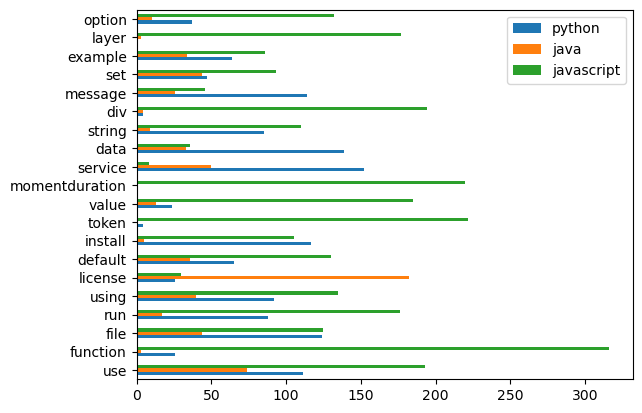

In [6]:
# From the 'functions.py' file...
# Call function to define word lists and frequencies of README word for each language
python_freq, java_freq, java_script_freq, all_freq, all_words, python_words, java_words, java_script_words = f.get_word_freqs(df)
# Call function to display a visualization of the top 20 words for each language 
f.top_twenty_words_vis(python_freq, java_freq, java_script_freq, all_freq)

**Summary**

Here we see our top 20 most commonly used words for all 3 languages. We can notice some words that may be good indicators of the programming language used by exploring this visualization. 

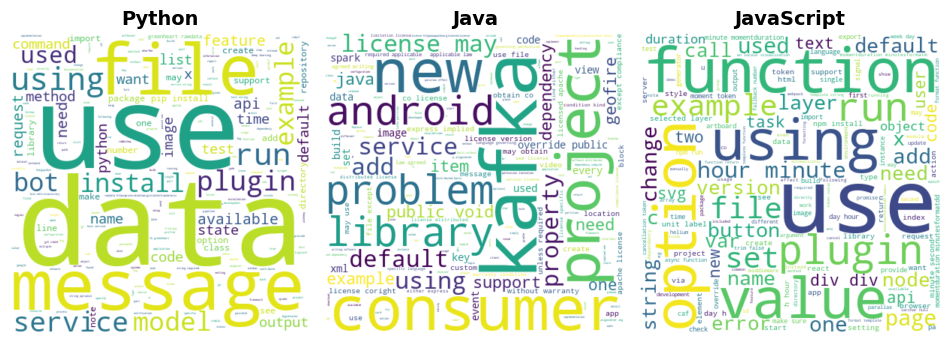

In [7]:
# From the 'functions.py' file...
# Call funtion to display wordgram for each language
f.get_wordgrams(python_words, java_words, java_script_words)

**Summary**

Here we see our wordgram that can identify common word for each language at a glance.

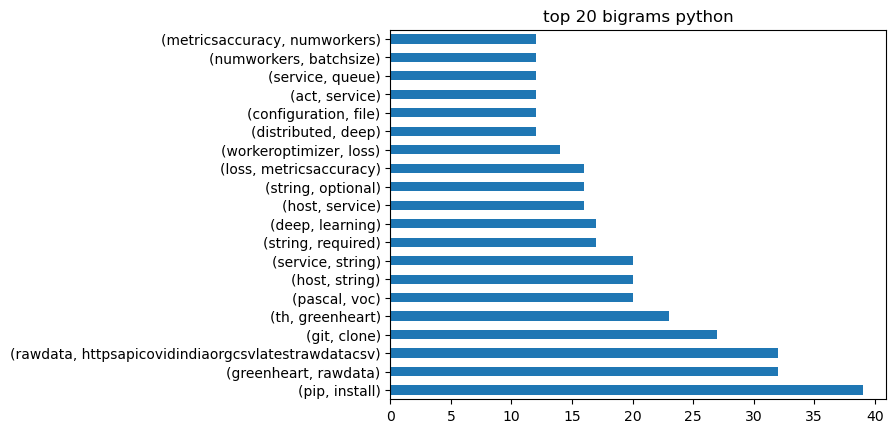

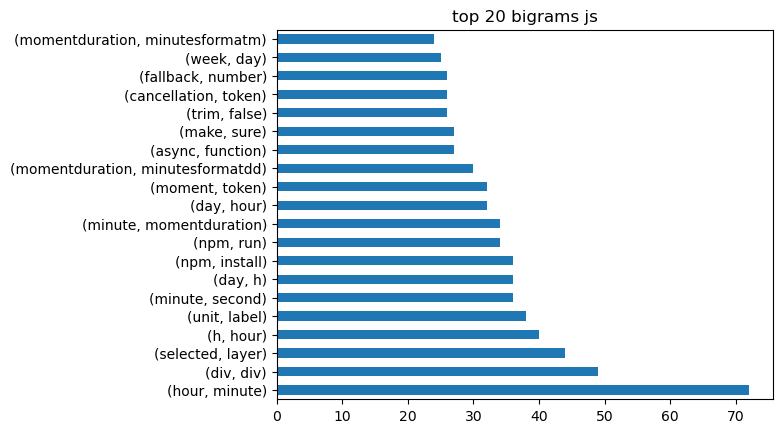

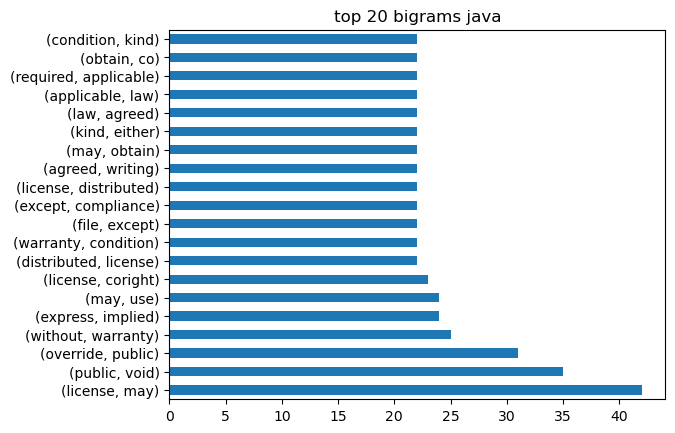

In [14]:
# From the 'functions.py' file...
# call funtion to display top 20 bigrams for each language
f.top_twenty_bigrams(java_words, python_words, java_script_words)

**Summary**

Here we see that there are some good indicators of programming language evident by reviewing bigrams.

<a id='exploresummary'></a>
<h3><b>Exploration Summary</b></h3>

Overall, the exploration shows us what may be good indicators of a repositories programming language by observing the top frequently used words, as well as word clouds. For instance: with bigrams, if  "pip install" is observed, there is a high chance of it being a python repository. Similarly, time measurments are shown here to be very evident in javascript repositories, and legal terminoligy shows to be common in java repositories.  

<li><a href='#explore'>Exploration Top</a></li>

---

<div style='background-color: cyan'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [11]:
# From the 'final.py' file...
# Obtain the baseline score of {FEATURE} via {METHOD}


---

<a id='modeltable'></a>
<h3><b>Models Table</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [12]:
# From the 'final.py' file...
# Get the scores of the baseline and 4 unique models


{METRIC HERE}:

{EXPLANATION OF REASONING HERE}

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [13]:
# From the 'final.py' file...
# Get the scores of the baseline and the best model


<div style='background-color: cyan'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

SUMMARY HERE

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

RECOMMENDATIONS HERE

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

NEXT-STEPS HERE